## RNN basic 01

In [8]:
import torch
import torch.nn as nn
import numpy as np

# Set the random seed for reproducibility
torch.manual_seed(0)

# Declare dimensions
input_size = 4
hidden_size = 2

# Prepare the input data as numpy array
# Here, we're encoding characters ('h', 'e', 'l', 'o') as one-hot vectors
h = [1, 0, 0, 0]  # Encoding for 'h'
e = [0, 1, 0, 0]  # Encoding for 'e'
l = [0, 0, 1, 0]  # Encoding for 'l'
o = [0, 0, 0, 1]  # Encoding for 'o'
input_data_np = np.array([[h, e, l, l, o], 
                          [e, o, l, l, l], 
                          [l, l, e, e, l]], dtype=np.float32)

# Convert numpy array to torch tensor
input_data = torch.Tensor(input_data_np)    # torch.Size([3, 5, 4])

# Initialize RNN
rnn = nn.RNN(input_size, hidden_size)

# Get the output from RNN
output, hidden = rnn(input_data)

# Print the outputs and their shape
print(output)
print(output.size(), hidden.size())

tensor([[[-0.7497, -0.6135],
         [-0.5282, -0.2473],
         [-0.9136, -0.4269],
         [-0.9136, -0.4269],
         [-0.9028,  0.1180]],

        [[-0.5753, -0.0070],
         [-0.9052,  0.2597],
         [-0.9173, -0.1989],
         [-0.9173, -0.1989],
         [-0.8996, -0.2725]],

        [[-0.9077, -0.3205],
         [-0.8944, -0.2902],
         [-0.5134, -0.0288],
         [-0.5134, -0.0288],
         [-0.9127, -0.2222]]], grad_fn=<StackBackward0>)
torch.Size([3, 5, 2]) torch.Size([1, 5, 2])


## RNN basic 02

In [9]:
import torch
import numpy as np

# Random seed for reproducibility
torch.manual_seed(0)

# Character set
char_set = ['h', 'i', 'e', 'l', 'o']

# Hyperparameters
input_size = len(char_set)
hidden_size = len(char_set)
learning_rate = 0.1

# Data preparation
x_data = [[0, 1, 0, 2, 3, 3]]  # Input indexes
x_one_hot = [[[1, 0, 0, 0, 0],  # 'h'
              [0, 1, 0, 0, 0],  # 'i'
              [1, 0, 0, 0, 0],  # 'h'
              [0, 0, 1, 0, 0],  # 'e'
              [0, 0, 0, 1, 0],  # 'l'
              [0, 0, 0, 1, 0]]] # 'l'
y_data = [[1, 0, 2, 3, 3, 4]]   # Target indexes

# Convert to torch tensors
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)


print(f"{X.size()}\n{X}")
print(f"{Y.size()}\n{Y}")

torch.Size([1, 6, 5])
tensor([[[1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 1., 0.]]])
torch.Size([1, 6])
tensor([[1, 0, 2, 3, 3, 4]])


In [ ]:
import torch.optim as optim

# RNN model
rnn = nn.RNN(input_size, hidden_size, batch_first=True)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), learning_rate)

# Training loop
for i in range(100):
    optimizer.zero_grad()
    outputs, _ = rnn(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    # Print training progress
    if i % 10 == 0:
        result = outputs.data.numpy().argmax(axis=2)
        result_str = ''.join([char_set[c] for c in np.squeeze(result)])
        print(f'Epoch: {i}, Loss: {loss.item()}, Prediction: {result_str}')

# Final prediction after training
result = outputs.data.numpy().argmax(axis=2)
result_str = ''.join([char_set[c] for c in np.squeeze(result)])
print(f'Final Prediction: {result_str}')

## RNN basic 03

In [ ]:
import torch
import torch.optim as optim
import numpy as np

torch.manual_seed(0)

# make dictionary
sample = " if you want you"
char_set = list(set(sample))
char_dic = {c: i for i, c in enumerate(char_set)}

# hyper parameters
dic_size = len(char_dic)
hidden_size = len(char_dic)
learning_rate = 0.1

# data setting
sample_idx = [char_dic[c] for c in sample]
x_data = [sample_idx[:-1]]
x_one_hot = [np.eye(dic_size)[x] for x in x_data]
y_data = [sample_idx[1:]]

# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [ ]:
# declare RNN
rnn = torch.nn.RNN(dic_size, hidden_size, batch_first=True)

# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), learning_rate)

# start training
for i in range(50):
    optimizer.zero_grad()
    outputs, _ = rnn(X)
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    result = outputs.data.numpy().argmax(axis=2)
    result_str = ''.join([char_set[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

## RNN basic 04

In [3]:
import torch
import torch.optim as optim
import numpy as np

# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

# make dictionary
char_set = list(set(sentence))
char_dic = {c: i for i, c in enumerate(char_set)}

# hyper parameters
dic_size = len(char_dic)
hidden_size = len(char_dic)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

# data setting
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index
    
x_one_hot = [np.eye(dic_size)[x] for x in x_data]

# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [ ]:
# declare RNN + FC
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.fc(x)
        return x


net = Net(dic_size, hidden_size, 2)

# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

# start training
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        print(i, j, ''.join([char_set[t] for t in result]), loss.item())
        if j == 0:
            predict_str += ''.join([char_set[t] for t in result])
        else:
            predict_str += char_set[result[-1]]

    print(predict_str)

## RNN basic 05: timeseries

In [6]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 랜덤 시드 설정으로 재현 가능한 결과를 얻습니다.
torch.manual_seed(0)

def minmax_scaler(data):
    """Min-Max 정규화를 수행하는 함수입니다."""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 작은 수를 더해 0으로 나누는 것을 방지합니다.
    return numerator / (denominator + 1e-7)

def build_dataset(time_series, seq_length):
    """시계열 데이터로부터 데이터셋을 구축하는 함수입니다."""
    dataX, dataY = [], []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # 다음 종가
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

# 하이퍼파라미터 설정
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

# 데이터 로딩 및 전처리
xy = np.loadtxt("data/data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]  # 데이터 순서 뒤집기

# 훈련 데이터와 테스트 데이터로 분할
train_size = int(len(xy) * 0.7)
train_set, test_set = xy[0:train_size], xy[train_size - seq_length:]

# 데이터 정규화
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

# 데이터셋 생성
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# 파이토치 텐서로 변환
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)
testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

/Users/hyungseok/anaconda3/envs/llm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0 0.2271038293838501
1 0.18340937793254852
2 0.15106438100337982
3 0.12612313032150269
4 0.10598734766244888
5 0.08915018290281296
6 0.07493707537651062
7 0.06327901035547256
8 0.054496027529239655
9 0.049023859202861786
10 0.04693441092967987
11 0.04731706529855728
12 0.04838264361023903
13 0.04839478060603142
14 0.04633767157793045
15 0.04207771643996239
16 0.036201708018779755
17 0.02966201677918434
18 0.02338656783103943
19 0.018011245876550674
20 0.013800665736198425
21 0.010714659467339516
22 0.008532224223017693
23 0.006976510863751173
24 0.005824483931064606
25 0.004987425170838833
26 0.004524713847786188
27 0.004554683342576027
28 0.005089898128062487
29 0.00592096708714962
30 0.006684894207865
31 0.0070726750418543816
32 0.006973991170525551
33 0.006471905391663313
34 0.005753522738814354
35 0.005014694295823574
36 0.0043952930718660355
37 0.003953744191676378
38 0.0036766394041478634
39 0.003510984592139721
40 0.003401308786123991
41 0.0033151088282465935
42 0.00324889598414

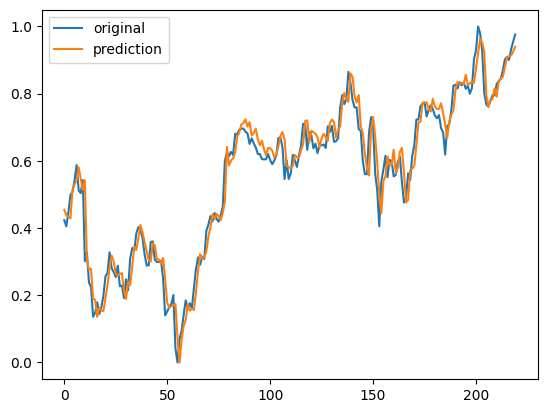

In [7]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        """LSTM 기반의 네트워크를 초기화합니다."""
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        """모델의 순전파를 정의합니다."""
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1])  # 마지막 시퀀스만 사용
        return x

# 모델, 손실 함수, 옵티마이저 설정
net = Net(data_dim, hidden_dim, output_dim, 1)
criterion = torch.nn.MSELoss()  # 평균 제곱 오차 손실
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# 훈련 과정
for i in range(iterations):
    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()

    if i % 100 == 0:  # 100회 반복마다 로그 출력
        print(f'Epoch {i}/{iterations}, Loss: {loss.item()}')

# 테스트 데이터에 대한 예측 및 시각화
test_predict = net(testX_tensor).data.numpy()
plt.plot(testY)
plt.plot(test_predict)
plt.legend(['Original', 'Prediction'])
plt.show()